이번에 사용할 데이터 셋은 영화 리뷰 데이터 셋이며  
감성평에 따라 긍정과 부정으로 분류되어 있다.  
총 50,000개의 샘플이 있고 훈련 25,000개, 테스트 25,000개다.  
  
---
  
텍스트 데이터의 경우, 단어를 숫자 데이터로 바꾸는 방법은  
데이터에 등장하는 단어마다 고유정수를 부여하는 것이다.  
예를 들면 he는 10, the는 12 이런식으로 말이다.  
  
영어를 기준으로, 모두 소문자로 바꾸고 구둣점을 지우고  
공백을 기준으로 분리한다.  
이렇게 분리된 단어를 토큰이라고 한다.  
  
토큰에 할당하는 정수 중에는 특정 용도로 예약된 경우가 많다.  
예를 들어, 0은 패딩, 1은 문장 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.  


이번에 사용할 데이터 셋은 이미 정수로 바꾼 데이터가 포함되어 있다.  
이 데이터를 가져와 보자

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [2]:
# 우선 훈련세트와 테스트 세트 크기를 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


선술했듯 각각 2만 5000개씩 있다.

---

이번엔 1 ~ 2 번째 리뷰의 길이를 출력해보자

In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


리뷰들의 길이가 다 다르다.  
첫 번째 리뷰에 담긴 내용을 보자

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


각 모든 단어가 정수로 변환되어 있다.  
어휘 사전에 없는 단어는 모두 2로 표시된다.  
이번에는 타깃 데이터를 출력해 보자

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


20개를 출력한 것, 타깃 값이 부정은 0, 긍정은 1로 나뉜다.  

---

훈련 세트에서 크기가 25,000개 였으므로 20%를 검증세트로 떼어놓으면 훈련 세트의 크기는 20,000개로 줄어들 것이다.

In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state =42)

우선 배열 준비

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

배열에서 리뷰 길이의 평균과 중간값을 구해보자

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개, 중간값은 178이다.  
이는 데이터가 한 쪽에 치우쳐져 있음을 마랳준다.  
히스토그램으로 표현해보자

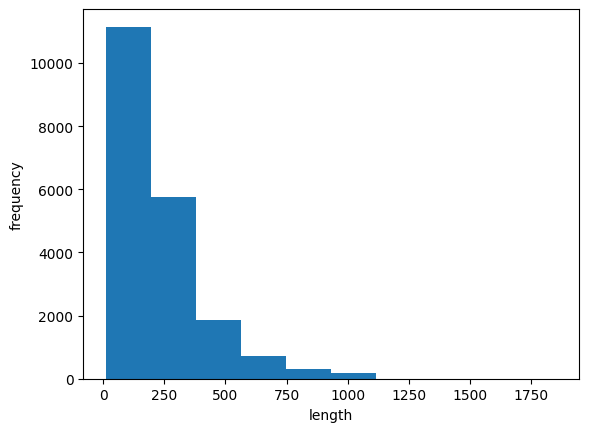

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

단어가 100개도 안되는 리뷰들은 길이를 100에 맞추어야 한다.  
이때 사용하는 것이 바로 패딩이다.  
인풋의 길이를 100으로 맞추자.  

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [12]:
print(train_seq.shape)

(20000, 100)


이제 길이를 100으로 맞춘 (20000, 100) 크기의 2차원 배열이 되었다.  
첫 번째 샘플을 출력해보자

In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


이 샘플의 앞이나 뒤 어디가 짤렸는지 알 수 없다.  
원본과 비교해보자

In [14]:
print(train_input[0][-10:]) # 원본의 첫 번째 샘플에서 끝에서 10개를 출력

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


이를 통해 앞부분이 잘렸다는 것을 알 수 있다.  
자르는 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자른다.  
이러는 이유는 일반적으로 뒷부분 정보가 더 유용할 것으로 기대되기 때문이다.  
만약 뒷 부분을 잘라내고 싶다면  
pad_sequences() 함수의 truncating 매개변수 값을 기본값인 pre가 아닌 post로 바꾸면 된다.  

6 번째 샘플을 출력해보자

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있다는 것은 패팅이 삽입된 것으로 실제 샘플 길이는 100이 안 된다.  
패딩으로 데이터를 가공할 때, 너무 길면 앞이 잘리는 것처럼 그 반대도 마찬가지다.  
역시나 pad_sequences() 함수를 사용해서 방향을 바꿔줄 수 있다.   
  
이런 방식으로 검증 세트 길이도 100으로 맞춰보자

In [16]:
val_seq = pad_sequences(val_input, maxlen = 100)

이로써 검증세트와 훈련세트가 준비되었다.

# 순환 신경망 만들기
우선 케라스의 Sequential 클래스로 만든 신경망 코드를 살펴보자

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

input_shape의 입력차원이 100, 500 인 것은 샘플길이와 사용가능 단어 수에 따른다.  
원-핫 인코딩을 사용해야 한다.  
케라스의 함수를 사용해 원-핫 인코딩 배열을 반환해보자

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
# 배열의 크기 출력
print(train_oh.shape)

(20000, 100, 500)


(20000, 100) 크기의 train_seq가 (20000, 100, 500)크기의 train_oh로 바뀌었다.

---

첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩 되었는지 확인해보자

In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


11번째 원소만 1이다. 나머지는 0인지 확인

In [21]:
print(np.sum(train_oh[0][0]))

1.0


11번째 토큰만 1이고 나머지는 모두 0이어서 원-핫 인코딩된 배열의 값을  
모두 더한 결과가 1이 되었다.  
같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어보자

In [22]:
val_oh = keras.utils.to_categorical(val_seq)

이로써 훈련에 사용할 훈련세트와 검증세트가 준비되었다.  
앞서 만든 모델 구조를 출력해보자

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


# 순환 신경망 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 65ms/step - loss: 0.6869 - val_loss: 0.6738
Epoch 2/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6647 - val_loss: 0.6572
Epoch 3/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6458 - val_loss: 0.6388
Epoch 4/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6270 - val_loss: 0.6273
Epoch 5/100
313/313 [==============================] - 30s 96ms/step - loss: 0.6086 - val_loss: 0.6093
Epoch 6/100
313/313 [==============================] - 21s 65ms/step - loss: 0.5919 - val_loss: 0.5882
Epoch 7/100
313/313 [==============================] - 17s 55ms/step - loss: 0.5758 - val_loss: 0.5756
Epoch 8/100
313/313 [==============================] - 19s 60ms/step - loss: 0.5603 - val_loss: 0.5636
Epoch 9/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5462 - val_loss: 0.5522
Epoch 10/100
313/313 [==============================] - 18s 57ms/step - l

이 훈련은 35번째 에포크에서 조기종료 되었다.  
검증세트에 대한 정확도는 약 80% 정도다.  
뛰어난건 아니지만 성과는 어느정도 있다.  

---

그래프로 표현해보자

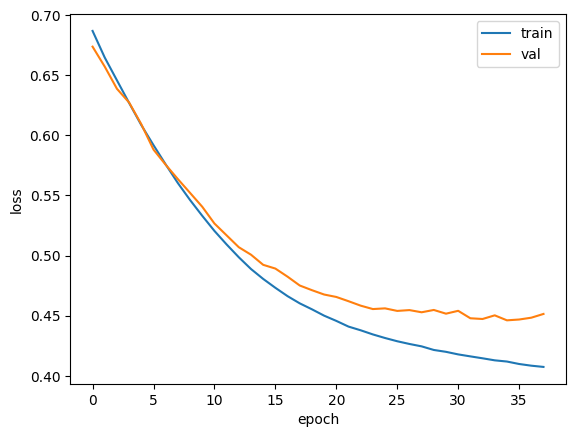

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

윈 - 핫 인코딩의 단점은 입력 데이터가 엄청나게 커진다는 것이다.  
출력 크기를 확인해보자

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


토큰 1개를 500차원으로 늘렸으니 대략 500배가 커진다.  
이는 좋은 방법이 아니다.  
순환 신경망에 사용하는 더 좋은 단어 표현 방법을 알아보자

# 단어 임베딩을 사용하기

순환 신경망에서 텍스트를 처리할 때 즐겨 쓰는 방법으로  
각 단어를 고정된 크기의 실수 벡터로 바꾼다.  
이런 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워지기에  
성능면에서도 더 좋은 결과를 보인다.  
   
단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다.  
때문에 메모리를 보다 더 효율적으로 사용할 수 있다.  
  
앞서 원-핫 인코딩에서는 샘플 하나를 500차원으로 늘렸다.  
하지만 단어 임베딩은 더 작은 크기로 단어를 잘 표현할 수 있다.

In [27]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

임베딩의 500은 어휘사전의 크기이다.  
임베딩의 16은 임베딩 벡터의 크기로 원-핫 인코딩 보다 훨씬 작은 크기를 사용한다.  
마지막 input_length는 샘플의 길이다. 앞서 100으로 통일했었다.  
  
데이터 구조를 출력해보자

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


이 모델은 (100, ) 크기의 입력을 받아 (100, 16)크기의 출력을 만든다.  
Embeddomg 클래스는 500개의 토큰을 크기가 16인 벡터로 변경하기 때문에 500 * 16개의  
모델 파라미터를 가진다.  
그 다음 SimpleRNN 층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해   필요한 가중치 16 * 8  = 128개를 가진다.  
또한 은닉 상태에 곱해지는 가중치 8 * 8 = 64 개가 있다.  
마지막으로 8개의 절편이 있으므로 이 순환층 전체 모델의  
파라미터 수는 128 + 64 + 8 = 200 개 이다.  
마지막 Dense층의 가중치 개수는 이전과 동일하게 9개다.  
모델 훈련과정은 이전과 동일하다.

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5',save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 32ms/step - loss: 0.6952 - accuracy: 0.5093 - val_loss: 0.6940 - val_accuracy: 0.5084
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6897 - accuracy: 0.5332 - val_loss: 0.6915 - val_accuracy: 0.5202
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6852 - accuracy: 0.5564 - val_loss: 0.6893 - val_accuracy: 0.5338
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6807 - accuracy: 0.5742 - val_loss: 0.6872 - val_accuracy: 0.5406
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6760 - accuracy: 0.5888 - val_loss: 0.6851 - val_accuracy: 0.5472
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6712 - accuracy: 0.6013 - val_loss: 0.6831 - val_accuracy: 0.5516
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6662 - accuracy: 0.6079 - val_loss: 0.6808 - val_accur

출력 결과, 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다.  
반면 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어들었다.  
마지막으로 훈련 손실과 검증 손실을 그래프로 출력해보자  

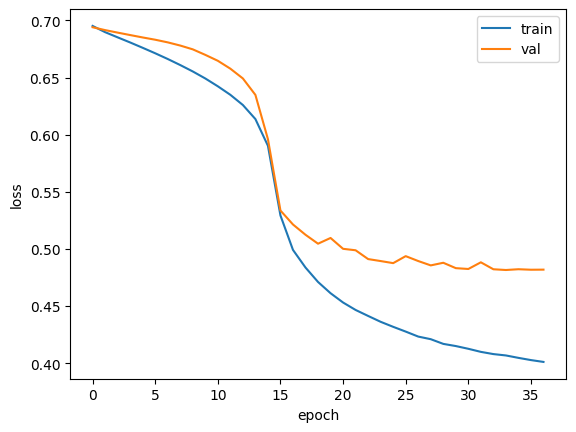

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

적절한 시기에 조기종료되었다.  

# 정리
### 말뭉치
말뭉치는 자연어 처리에서 사용하는 텍스트 데이터의 모음, 즉 훈련 데이터셋을 일컫는다.  
### 토큰
토큰은 텍스트에서 공백으로 구분되는 문자열을 말한다.  
### 원-핫 인코딩
어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터  
정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘사전 크기의 벡터가 만들어진다.  
### 단어 임베딩
단어 임베딩은 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환한다.  
이것은 단어 사이에 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘한다.  
